<a href="https://colab.research.google.com/github/derek881107/Advanced-Regression-Techniques-A-Comprehensive-Guide-to-Predicting-House-Prices/blob/main/featured_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting House Prices: The Ultimate Machine Learning Adventure (with Feature Selection Magic!)
Welcome to a journey where data meets genius (and a bit of luck). In this project, we’re not just predicting house prices—we’re throwing everything at the problem: feature selection wizardry, stacking models, and genetic algorithms that might just outsmart us.

If you’ve ever wondered how to turn messy datasets into a masterpiece of predictions, buckle up!

# Why This Project is Awesome
**Data Preprocessing (aka Spring Cleaning):**

Missing data? No problem. We sweep it under the rug (imputation) like true professionals.
Categorical variables? Label them and make them behave.
Outrageous house prices? Log-transform them into submission.

**Feature Selection (The Gladiator Arena):**

SelectFromModel: "Let the most important features survive!"
Sequential Feature Selector: Slow and steady forward selection for the win.
Genetic Algorithm: Let Darwin decide which features deserve to live.
Bonus: We even draw a Venn diagram to show who wins the feature selection showdown.

**Model Training (The Real Fight):**

The contenders:

LinearRegression (the classic).

RandomForestRegressor (tree-hugger’s favorite).

GradientBoostingRegressor (the overachiever).

SVR (the mysterious one).

DecisionTreeRegressor (because why not?).

And then… STACK THEM TOGETHER for ultimate glory.

**Hyperparameter Tuning (Turning Dials Like a Pro):**

We grid search until the stacking model screams, "I’m optimized!"

**Evaluation (How Did We Do?):**

Fancy ROC curves to show off our AUC scores.

Feature importance charts so we look smart.

Q-Q plots, because everyone loves a good quantile joke.

**Results Visualization:**

Compare model predictions like it’s a beauty contest.

Watch house prices align (or not) across all models.

**What You’ll Learn**

How to clean and preprocess data without breaking a sweat.

Why feature selection is basically a reality show for your dataset.

The art of stacking models (spoiler: it’s like teamwork but for machines).

How to make your project look extra cool with fancy plots and diagrams.

**How to Join the Fun**

Clone this repo and install the magic ingredients:
bash

pip install deap xgboost scikit-learn seaborn matplotlib geneticalgorithm matplotlib-venn

Feed the script your datasets (hw4train.csv and hw4test.csv).
Sit back as the code cleans, selects, trains, tunes, and predicts.

Grab your shiny new submission.csv and pretend you always knew house prices this well.

**Why You’ll Love It**

You’ll feel like a data scientist magician pulling features out of a hat.

Your models will work together like a dream team (stacking FTW).
You’ll impress your friends with words like "genetic algorithm" and "log transformation."

Best of all, you’ll finally know how much your dream house should cost (give or take).

**Warning**

This project might cause:

Overconfidence in your feature selection skills.

An unhealthy obsession with ROC curves.

A sudden desire to use genetic algorithms for everything.

Dive in and predict those house prices like a true data wizard.
Let’s make machine learning fun, one house at a time! 🏠📊

In [ ]:
# Step 1:Input
!pip install deap xgboost scikit-learn seaborn matplotlib geneticalgorithm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.6 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15076 sha256=39ab107e6b6d519953c6d3599d79956312ae37cd8ba7b3a8e4bfd63f7a8b024a
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [ ]:
# Step 2: Input
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Step 3: upload datasets
from google.colab import files
uploaded = files.upload()

train_path = 'hw4train.csv'
test_path = 'hw4test.csv'

train = pd.read_csv(train_path, na_values="NA")
test = pd.read_csv(test_path, na_values="NA")

Saving hw4test.csv to hw4test.csv
Saving hw4train.csv to hw4train.csv


In [ ]:
# Step 4: take out 'SalePrice'
target = 'SalePrice'
y = train[target]
train.drop(columns=[target], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

### **Processing Missing Data**

In [ ]:
# Step 5: missing data
missing_train = train.isnull().mean()
train = train.loc[:, missing_train < 0.5]
test = test.loc[:, train.columns]

categorical_cols = train.select_dtypes(include=['object']).columns
numerical_cols = train.select_dtypes(include=['number']).columns

train[categorical_cols] = train[categorical_cols].fillna('None')
test[categorical_cols] = test[categorical_cols].fillna('None')
train[numerical_cols] = train[numerical_cols].fillna(train[numerical_cols].mean())
test[numerical_cols] = test[numerical_cols].fillna(test[numerical_cols].mean())

# using LabelEncoder
for col in categorical_cols:
    encoder = LabelEncoder()
    combined_data = pd.concat([train[col], test[col]], axis=0).astype(str)
    encoder.fit(combined_data)
    train[col] = encoder.transform(train[col].astype(str))
    test[col] = encoder.transform(test[col].astype(str))

In [ ]:
# Step 6: Apply a logarithmic transformation to SalePrice.
y_log = np.log1p(y)

In [ ]:
# Step 7: Feature selection for subset data
# use Stratified Subset
train_subset, _, y_subset, _ = train_test_split(train, y_log, test_size=0.8, random_state=42, stratify=pd.qcut(y_log, q=4))


Performing feature selection...
Using SelectFromModel...
Features selected by SelectFromModel: ['TotalBsmtSF', 'EnclosedPorch', 'GrLivArea', 'BsmtQual', 'MSSubClass', 'BsmtFinSF1', 'YearBuilt', 'MasVnrArea', '2ndFlrSF', 'CentralAir', 'GarageYrBlt', 'Neighborhood', 'Id', 'OpenPorchSF', 'Exterior2nd', 'BsmtUnfSF', 'YearRemodAdd', 'LotFrontage', 'OverallQual', 'TotRmsAbvGrd', 'MoSold', 'Fireplaces', 'GarageCars', 'Heating', 'GarageType', 'GarageQual', 'BsmtFullBath', 'FullBath', 'OverallCond', 'BedroomAbvGr', '1stFlrSF', 'LotArea', 'GarageArea', 'WoodDeckSF', 'KitchenQual', 'MSZoning', 'GarageFinish', 'BsmtFinType1']


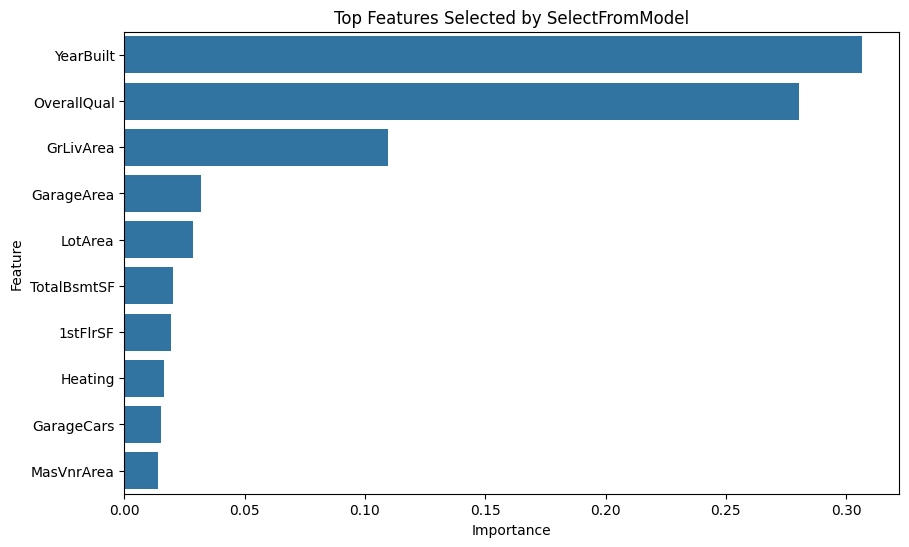

Using SequentialFeatureSelector...
Features selected by SequentialFeatureSelector: ['GrLivArea', '2ndFlrSF', 'GarageCond', 'YearRemodAdd', 'OverallQual', 'BsmtFullBath', 'LotShape', 'OverallCond', 'BedroomAbvGr', 'MSZoning']
Using GeneticSelectionCV...
Features selected by GeneticSelectionCV: ['TotalBsmtSF', 'EnclosedPorch', 'PavedDrive', 'Functional', 'BldgType', 'GrLivArea', 'BsmtQual', 'MSSubClass', 'KitchenAbvGr', 'BsmtFinSF1', 'LowQualFinSF', '2ndFlrSF', 'Street', 'GarageCond', 'BsmtCond', 'PoolArea', 'GarageYrBlt', 'HeatingQC', 'Exterior2nd', 'BsmtExposure', 'BsmtUnfSF', 'YearRemodAdd', 'RoofMatl', 'MiscVal', 'LotFrontage', 'OverallQual', 'Condition2', 'TotRmsAbvGrd', 'Condition1', 'Fireplaces', 'GarageCars', 'Heating', 'GarageType', 'Utilities', 'SaleCondition', 'HalfBath', 'LotShape', 'OverallCond', 'BedroomAbvGr', 'LotArea', 'Foundation', 'KitchenQual', 'BsmtFinType1']


In [ ]:
# Step 8: feature selection
print("Performing feature selection...")

# option 1: SelectFromModel
print("Using SelectFromModel...")
sfm_model = RandomForestRegressor(n_estimators=50, random_state=42)
sfm_model.fit(train_subset, y_subset)
sfm = SelectFromModel(sfm_model, threshold='median')
sfm_features = sfm.get_support()  # Boolean mask for selected features.
selected_features_sfm = train.columns[sfm_features]
print(f"Features selected by SelectFromModel: {selected_features_sfm.tolist()}")


sfm_importances = sfm_model.feature_importances_
sfm_importances_df = pd.DataFrame({'Feature': train.columns, 'Importance': sfm_importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=sfm_importances_df.head(10), x='Importance', y='Feature')
plt.title('Top Features Selected by SelectFromModel')
plt.show()

# option 2: SequentialFeatureSelector
print("Using SequentialFeatureSelector...")
sfs_model = GradientBoostingRegressor(n_estimators=50, random_state=42)
sfs = SequentialFeatureSelector(
    sfs_model,
    n_features_to_select=10,
    direction='forward',
    scoring='neg_mean_squared_error',
    cv=3
)
sfs.fit(train_subset, y_subset)
sfs_features = sfs.get_support()   # Boolean mask for selected features.
selected_features_sfs = train.columns[sfs_features]
print(f"Features selected by SequentialFeatureSelector: {selected_features_sfs.tolist()}")

# option 3: GeneticSelectionCV
print("Using GeneticSelectionCV...")
from deap import base, creator, tools, algorithms

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

def genetic_feature_selection(X, y, n_features):
    def fitness(individual):
        selected_features = [bool(gene) for gene in individual]
        if sum(selected_features) < n_features:
            return float('inf'),  # avoiding less datasets
        scores = cross_val_score(RandomForestRegressor(), X[:, selected_features], y, cv=3, scoring='neg_mean_squared_error')
        return -scores.mean(),

    n_features_total = X.shape[1]
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", np.random.randint, 0, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n_features_total)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", fitness)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=50)
    algorithms.eaSimple(population, toolbox, cxpb=0.6, mutpb=0.3, ngen=20, verbose=False)

    best_individual = tools.selBest(population, k=1)[0]
    selected = [bool(gene) for gene in best_individual]
    return selected

genetic_features = genetic_feature_selection(train_subset.values, y_subset, n_features=10)
selected_features_genetic = train.columns[genetic_features]
print(f"Features selected by GeneticSelectionCV: {selected_features_genetic.tolist()}")

In [ ]:
# Step 9: build the stacking model
base_models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=50, random_state=42),
    'SVR': SVR(),
    'DecisionTree': DecisionTreeRegressor(random_state=42)
}

stacked_train_preds = np.zeros((train.shape[0], len(base_models)))
stacked_test_preds = np.zeros((test.shape[0], len(base_models)))

for idx, (name, model) in enumerate(base_models.items()):
    model.fit(train, y_log)
    stacked_train_preds[:, idx] = model.predict(train)
    stacked_test_preds[:, idx] = model.predict(test)

In [ ]:
# Step 10: stacking model and hyperparamater tunning
stacked_model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}

grid = GridSearchCV(stacked_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid.fit(stacked_train_preds, y_log)
best_stacked_model = grid.best_estimator_

print(f"Stacked Model Best Params: {grid.best_params_}")

# prediction
final_pred_log = best_stacked_model.predict(stacked_test_preds)
final_pred = np.expm1(final_pred_log)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Stacked Model Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
# store result
test['Id'] = range(1, len(test) + 1)
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': final_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv


Common features across methods: ['2ndFlrSF', 'YearRemodAdd', 'OverallCond', 'BedroomAbvGr', 'OverallQual', 'GrLivArea']


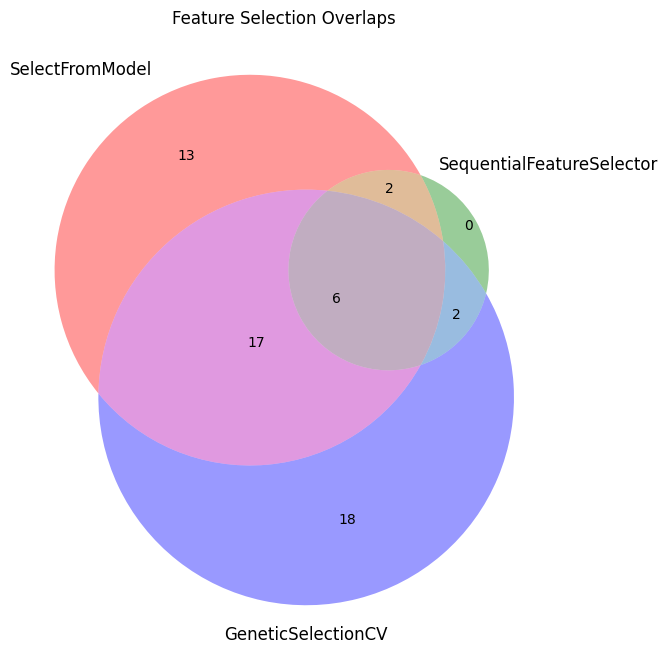

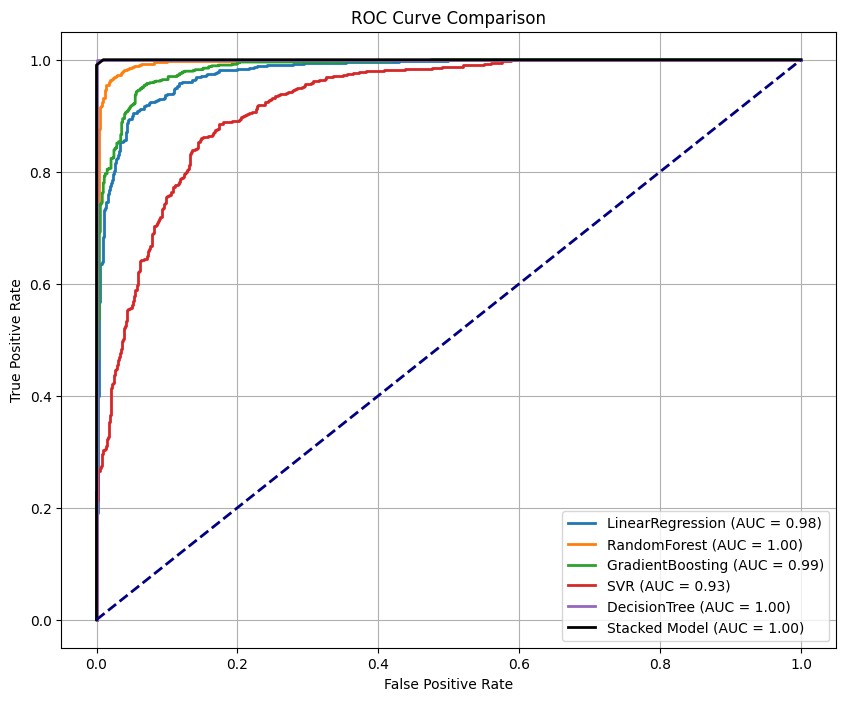

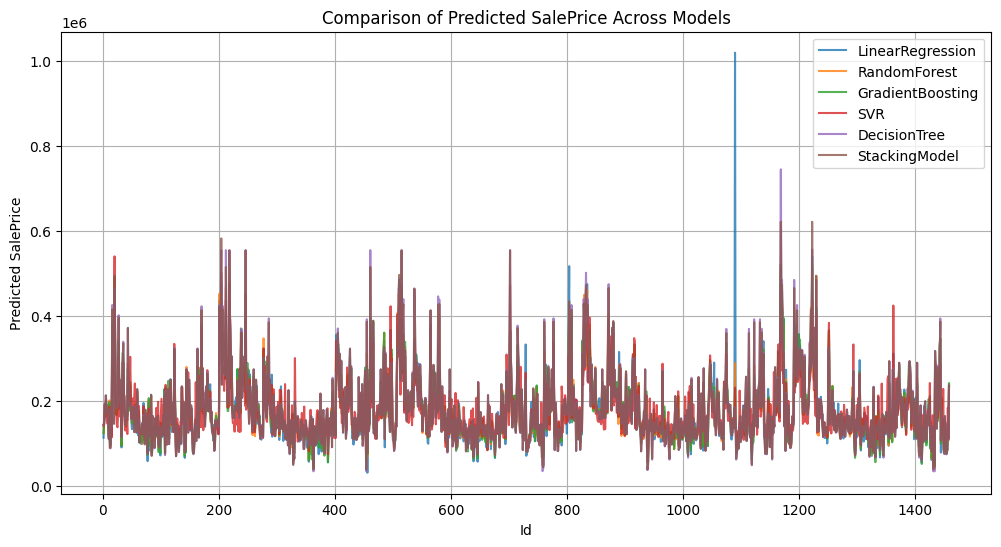

In [ ]:
# Step 11: Visualize feature selection overlaps
from matplotlib_venn import venn3

# Convert selected features to sets
sfm_features_set = set(selected_features_sfm)
sfs_features_set = set(selected_features_sfs)
genetic_features_set = set(selected_features_genetic)

# Find the intersection of the selected features
common_features = sfm_features_set & sfs_features_set & genetic_features_set
print(f"Common features across methods: {list(common_features)}")

# Visualize overlaps with a Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3([sfm_features_set, sfs_features_set, genetic_features_set],
             ('SelectFromModel', 'SequentialFeatureSelector', 'GeneticSelectionCV'))
plt.title("Feature Selection Overlaps")
plt.show()

# Step 12: Evaluate and plot AUC & ROC curve for stacking and base models
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Binarizer

# Convert regression predictions to binary for ROC/AUC
threshold = np.percentile(y_log, 50)  # Use median as threshold
y_binary = (y_log >= threshold).astype(int)

plt.figure(figsize=(10, 8))

# Plot ROC curves for base models
for idx, (name, _) in enumerate(base_models.items()):
    fpr, tpr, _ = roc_curve(y_binary, stacked_train_preds[:, idx])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for the stacking model
stacked_train_pred_binary = best_stacked_model.predict(stacked_train_preds)
fpr_stacked, tpr_stacked, _ = roc_curve(y_binary, stacked_train_pred_binary)
roc_auc_stacked = auc(fpr_stacked, tpr_stacked)
plt.plot(fpr_stacked, tpr_stacked, color='black', lw=2, label=f'Stacked Model (AUC = {roc_auc_stacked:.2f})')

# Plot configurations
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Step 13: Visualize model prediction comparisons
# Collect predictions
model_predictions = {}
for idx, (name, _) in enumerate(base_models.items()):
    model_predictions[name] = np.expm1(stacked_test_preds[:, idx])  # Transform predictions back

# Add stacking model predictions
model_predictions['StackingModel'] = final_pred

# Create a DataFrame for predictions
results_df = pd.DataFrame(model_predictions)
results_df['Id'] = range(1, len(test) + 1)

# Plot predictions across models
plt.figure(figsize=(12, 6))
for model in model_predictions.keys():
    plt.plot(results_df['Id'], results_df[model], label=model, alpha=0.8)

plt.xlabel("Id")
plt.ylabel("Predicted SalePrice")
plt.title("Comparison of Predicted SalePrice Across Models")
plt.legend()
plt.grid()
plt.show()
